In [1]:
# This file is created by Haifei

import time
import datetime
import sys
import numpy as np
from TimeTagger import Coincidences, Counter, Correlation, createTimeTagger, freeTimeTagger, Countrate, CoincidenceTimestamp, Coincidence
import matplotlib.pyplot as plt
from pylablib.devices import Thorlabs

# 1) init stage

stage = Thorlabs.KinesisMotor("83855348")
# stage.home()
# stage.wait_for_stop()

In [2]:
stage.home()
stage.wait_for_stop()

# -14077 < x < 881664
# -0.407 < x < 25.515

In [3]:
stage.get_position()

218635

In [ ]:
stage.move_to(0 * 34555)

# Global Scan

In [18]:
# stage.home()
# stage.wait_for_stop()
# stage.move_to(-14077)
# stage.wait_for_stop()

# 2) init tagger

tagger = createTimeTagger()
for j in range(1, 17):
    tagger.setTriggerLevel(j, 0.8)

tagger.setInputDelay(2, -10500)
tagger.setInputDelay(3, -2985)
tagger.setInputDelay(4, -7185)
# tagger.setInputDelay(5, -11395)

coin = Coincidence(
                tagger, [1, 3, 2, 4], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=coin.getChannels())

# 3) measure

t = datetime.datetime.now()
start_time = t.strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_Haifei/vis_{start_time}.txt"
f = open(filename, "w")

step = 0.01
sec = 60
counts = []

center = 118870 # 118870
ran = round(0.2 * 34555)
range_max = center + ran
range_min = center - ran

# range_max = 881664
# range_min = -14077

estimated_time = ( sec * (range_max - range_min) / (step * 34555) ) / 60

estimated_finish_time = (t + datetime.timedelta(minutes=estimated_time)).strftime("%y.%m.%d_%H.%M.%S")

print(f"Start time : {start_time}")
print(f"Estimated time : {estimated_time : .0f} min")
print(f"Estimated finish time : {estimated_finish_time}")

try:
    for pos in range(range_min, range_max, int(step*34555)):
        print(f"Moving to position {pos/34555:.3f} mm...")
        stage.move_to(pos)
        stage.wait_for_stop()
        cur_pos = stage.get_position()
        print(f"Current position: {cur_pos/34555:.3f} mm")
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("\n")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()
        print("counts: ", count)
        pos_count = [cur_pos] + [int(num) for num in count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
except Exception as e:
    raise e
finally:
    f.close()
    freeTimeTagger(tagger=tagger)

Start time : 24.06.20_15.34.17
Estimated time :  40 min
Estimated finish time : 24.06.20_16.14.17
Moving to position 3.240 mm...
Current position: 3.240 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  [222]
Moving to position 3.250 mm...
Current position: 3.250 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  [200]
Moving to position 3.260 mm...
Current position: 3.260 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  [230]
Moving to position 3.270 mm...
Current position: 3.270 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  [209]
Moving to position 3.280 mm...
Current position: 3.280 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  [213]
Moving to position 3.290 mm...
Current position: 3.290 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  [208]
Moving to position 3.300 mm...
Current position: 3.300 mm
Performing coincidence counting...
Time remaining:  

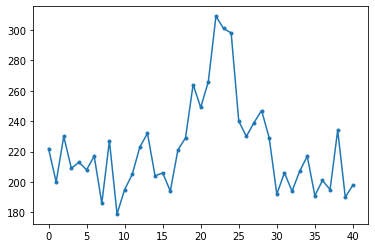

In [19]:
plt.plot(counts, ".-")
plt.savefig(filename[:-4] + '.jpg')
plt.show()

In [7]:
count2 = counts

In [9]:
count1 = counts

In [12]:
count3 = counts

In [15]:
counts = count1[:-1] + count2 + count3[1:]

In [21]:
f.close()
freeTimeTagger(tagger=tagger)

True

# Local Scan

In [74]:
# 2) init tagger

tagger = createTimeTagger()
for i in range(1, 17):
    tagger.setTriggerLevel(i, 1.5)

tagger.setInputDelay(7, 2500)
tagger.setInputDelay(1, 2100)
tagger.setInputDelay(5, 2100)

coin = Coincidence(
                tagger, [7, 2, 1, 5], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=coin.getChannels())

# 3) measure

t = datetime.datetime.now()
start_time = t.strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_Haifei/vis_{start_time}.txt"
f = open(filename, "w")

step = 0.01
sec = 100
counts = []

# center = 268000
range_min = 0
range_max = 500000

estimated_time = ( sec * (range_max - range_min) / (step * 34555) ) / 60

estimated_finish_time = (t + datetime.timedelta(minutes=estimated_time)).strftime("%y.%m.%d_%H.%M.%S")

print(f"Start time : {start_time}")
print(f"Estimated time : {estimated_time : .0f} min")
print(f"Estimated finish time : {estimated_finish_time}")

try: 
    for pos in range(range_min, range_max, int(step*34555)):
        print("\n======================================\n")
        print(f"Moving to position {pos/34555:.3f} mm...")
        stage.move_to(pos)
        stage.wait_for_stop()
        cur_pos = stage.get_position()
        print(f"Current position: {cur_pos/34555:.3f} mm")
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()
        print("counts: ", count)
        pos_count = [cur_pos] + [int(num) for num in count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
finally:
    f.close()
    freeTimeTagger(tagger=tagger)


plt.plot(counts, "o")
plt.savefig(filename[:-4] + '.jpg')
plt.show()

Start time : 24.03.09_14.29.09
Estimated time :  723 min
Estimated finish time : 24.03.10_02.32.38


Moving to position 0.000 mm...
Current position: -0.001 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [37]


Moving to position 0.010 mm...
Current position: 0.010 mm
Performing coincidence counting...
Time remaining:   23 s

KeyboardInterrupt: 

# DDDD DDDA Together

Start time : 24.03.01_14.16.52
Estimated time :  289 min
Estimated finish time : 24.03.01_19.06.16


Moving to position 7.611 mm...
Current position: 7.611 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [82 99]


Moving to position 7.621 mm...
Current position: 7.621 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [80 90]


Moving to position 7.631 mm...
Current position: 7.631 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [77 81]


Moving to position 7.641 mm...
Current position: 7.641 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [78 75]


Moving to position 7.651 mm...
Current position: 7.651 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [87 87]


Moving to position 7.661 mm...
Current position: 7.661 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [79 87]


Moving to position 7.671 mm...
Current position: 7.671 mm
Performing coincidence counting

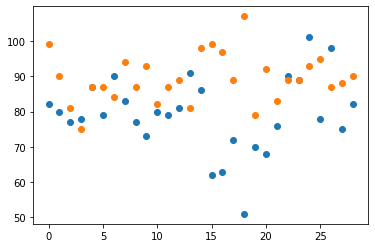

In [70]:
# 2) init tagger

tagger = createTimeTagger()
for i in range(1, 17):
    tagger.setTriggerLevel(i, 1.5)

tagger.setInputDelay(7, 2500)
tagger.setInputDelay(1, 2100)
tagger.setInputDelay(5, 2100)

coin_DDDD = Coincidence(
                tagger, [7, 8, 1, 5], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

coin_DDDA = Coincidence(
                tagger, [2, 8, 1, 5], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=[coin_DDDD.getChannel(), coin_DDDA.getChannel()])

# 3) measure

t = datetime.datetime.now()
start_time = t.strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_Haifei/vis_{start_time}.txt"
f = open(filename, "w")

step = 0.01
sec = 600
counts = []

range_min = 263000
range_max = 273000
# range_min = 259000
# range_max = 277000

estimated_time = ( sec * (range_max - range_min) / (step * 34555) ) / 60

estimated_finish_time = (t + datetime.timedelta(minutes=estimated_time)).strftime("%y.%m.%d_%H.%M.%S")

print(f"Start time : {start_time}")
print(f"Estimated time : {estimated_time : .0f} min")
print(f"Estimated finish time : {estimated_finish_time}")

try: 
    for pos in range(range_min, range_max, int(step*34555)):
        print("\n======================================\n")
        print(f"Moving to position {pos/34555:.3f} mm...")
        stage.move_to(pos)
        stage.wait_for_stop()
        cur_pos = stage.get_position()
        print(f"Current position: {cur_pos/34555:.3f} mm")
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()
        print("counts: ", count)
        pos_count = [cur_pos] + [int(num) for num in count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
finally:
    f.close()
    freeTimeTagger(tagger=tagger)


plt.plot(counts, "o")
plt.savefig(filename[:-4] + '.jpg')
plt.show()

In [ ]:
plt.plot(counts)

In [8]:
stage.move_to(115600)

In [7]:
f.close()

In [ ]:
freeTimeTagger(tagger=tagger)

# Stability Test

In [ ]:
# 2) init tagger

tagger = createTimeTagger()
for i in range(1, 17):
    tagger.setTriggerLevel(i, 1.5)

tagger.setInputDelay(7, 2500)
tagger.setInputDelay(1, 2100)
tagger.setInputDelay(5, 2100)

coin = Coincidence(
                tagger, [7, 8, 1, 5], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=coin.getChannels())

# 3) measure

t = datetime.datetime.now().strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_Haifei/vis_decay_{t}.txt"
f = open(filename, "w")

sec = 600
counts = []

points = 90
estimated_time = (sec / 60) * 90

print(f"Start time : {t}")
print(f"Estimated time : {estimated_time : .0f} min")

try: 
    for i in range(90):
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("\n")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()
        print("counts: ", count)
        pos_count = [int(num) for num in count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
finally:
    f.close()
    freeTimeTagger(tagger=tagger)


plt.plot(counts, linestyle = 'dotted')
plt.savefig(filename[:-4] + '.jpg')
plt.show()